## 基础概念  
## Uniform Distribution 均匀分布  

### 均匀分布也叫矩形分布，它是对称概率分布，在相同长度间隔的分布概率是等可能的。 均匀分布由两个参数a和b定义，它们是数轴上的最小值和最大值，通常缩写为U（a，b）。 

###均匀分布的2种形式：  
Discrete Uniform Distribution : 离散均匀分布  
例：一个书店每一天能卖掉的书的数量均匀的分布在100-300本之间 (能取的值是有限的数量) 

Continuous Uniform Distribution : 连续均匀分布  
例：明天北京的天气能均匀分布在12-17度之间（在这个范围，能取任何值）

## 例题  

 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs （修bug所需时间）

X is a continuous random variable. Let's see the distribution of X and answer the below questions.

问一：  随便选一个bug修，求所需要时间小于3小时的概率
Find the probability that a randomly selected software debugging requires less than three hours.

问二：  随便选一个bug修，求需要时间大于2小时概率
Find the probability that a randomly selected software debugging requires more than two hours.

问三： （所需要时间对应的）概率50%的话，这个所需要时间是多少？
Find the 50th percentile of the software debugging time.

In [ ]:
import os
print(os.path.abspath(".")) #读取note的位置，然后把要分析的csv放在这个文件夹里（MacOS）

In [31]:
#パッケージをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #可視化用
import seaborn as sns #可視化用
%matplotlib inline　
import scipy.stats as stats #科学計算用

In [5]:
debugging = pd.read_csv("debugging.csv")
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


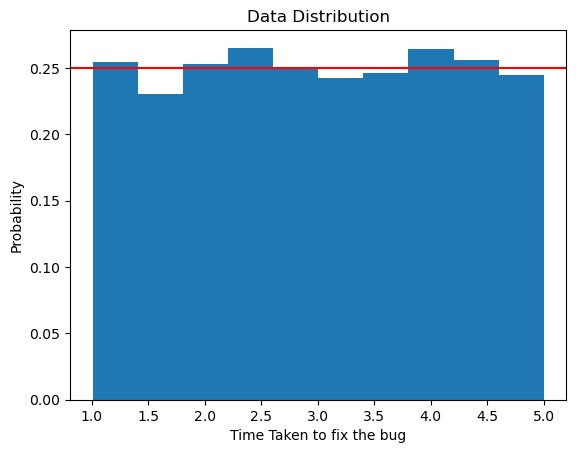

In [10]:
#可視化
plt.hist(debugging["Time Taken to fix the bug"], density = True)
plt.axhline(1/4, color = "red") #绘制平行于x轴的水平参考线
plt.xlabel("Time Taken to fix the bug")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

### Insight  
观察上图，我们可以发现：所有的值（修bug可能花的时间）是分布在1-5小时之间，然后有几乎相同的发生概率（红线提示：0.25），所以我们可以使用连续均匀分布。对于这里数轴上最大值最小值，我们选1和5。（参考基础概念）  

### X~U(1,5)

**Find the probability that a randomly selected software debugging requires a maximum time of 3 hours** 

**CDF:** of a random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$


In our case, the random variable (X) is the number of hours.

$ P(X\leq 3)$

/Users/Hsiun/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


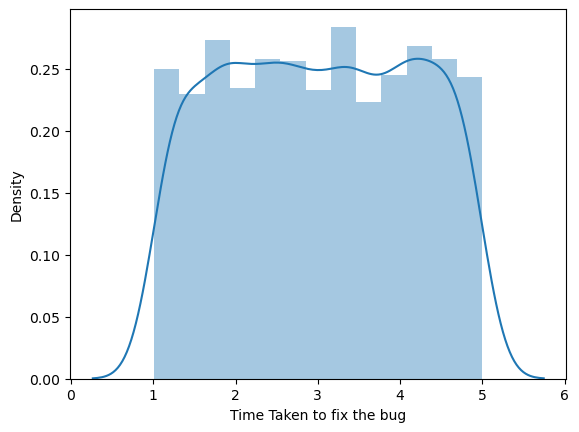

In [21]:
# density plot of time taken to fix the bug
#画出修理bug密度曲线
sns.distplot(debugging["Time Taken to fix the bug"], kde=True)
plt.show()

In [22]:
# 从Scipy导入均匀分布函数（uniform）
from scipy.stats import uniform

# 使用均匀分布函数（binom）来计算概略分布(因为是离散型变量，所以要用pdf)
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4) #从1开始（loc=1）,然后走4格到5

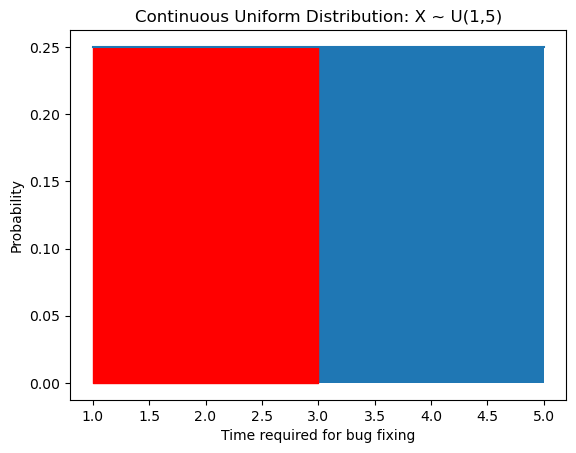

In [33]:
# 画出概率分布图
# 画出图后方便视觉观察和计算
# 其实也不可以不画图，照样回答问一
# 使用cdf来计算概率
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs) #上色
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [25]:
# 问一：随便选一个bug修，求所需要时间小于3小时的概率
uniform.cdf(x=3, loc=1, scale=4)

0.5

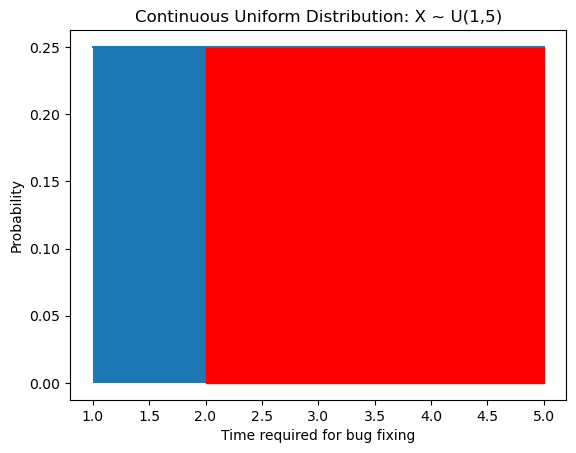

In [26]:
# 画出概率分布图
# 画出图后方便视觉观察和计算
# 其实也不可以不画图，照样回答问一
# 使用cdf来计算概率
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [28]:
# 问二：随便选一个bug修，求需要时间大于2小时概率
# P(x>2)
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

In [29]:
#问三（所需要时间对应的）概率50%的话，这个所需要时间是多少？
uniform.ppf(q=0.5, loc=1, scale=4)

3.0